In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import t

## CONFIDENCE INTERVALS

#### EXERCISE 1. 

    What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [12]:
n = 130
xbar = 98.25
s = 0.73
confidence = 0.99

In [14]:
sem = s/np.sqrt(n)
sem

0.06402523540941313

In [15]:
moe = 2.576 * sem 
upper_limit = xbar + moe
lower_limit = xbar - moe
ci = [lower_limit, upper_limit]
ci

[98.08507099358535, 98.41492900641465]

In [18]:
# stats library

ciz = stats.norm.interval(0.99, xbar, sem) #
ciz

(98.08508192246582, 98.41491807753418)

In [19]:
stats.t.interval(alpha = 0.99, df = n-1, loc = xbar, scale = sem)

/var/folders/vn/78_516p12yj8_056vvsyj3v00000gn/T/ipykernel_10896/3200529485.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha = 0.99, df = n-1, loc = xbar, scale = sem)


(98.08260738705933, 98.41739261294067)

In [17]:
t_crit = np.abs(t.ppf((1- confidence)/2,n))

In [19]:
(xbar-s*t_crit/np.sqrt(n), xbar+s*t_crit/np.sqrt(n)) 

(98.08262668697819, 98.41737331302181)

#### EXERCISE 2.

    The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [20]:
ad_n = 500
ad_mean = 5.4
ad_std = 3.1

In [21]:
sem = ad_std/np.sqrt(ad_n)
sem

0.13863621460498696

In [22]:
moe = 1.96 * sem
upper_limit = ad_mean + moe 
lower_limit = ad_mean - moe
ciz = [lower_limit, upper_limit]
ciz

[5.128273019374226, 5.671726980625775]

In [23]:
stats.t.interval(0.95, ad_n -1, ad_mean, sem)

(5.127617354510309, 5.672382645489692)

## HYPOTHESIS TESTING

#### EXERCISE 3. 
    
    The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826



In [25]:
pay_mean = 13.20
pay_std = 2.50

pay_n = 40
pay2_mean = 12.20

In [28]:
# t = (x_bar - mu)/(sigma/sqrt(n))
t = (pay2_mean - pay_mean)/(pay_std/np.sqrt(pay_n))
p = stats.t.cdf(t, pay_n -1)

p

0.0077816812266594355

In [ ]:
# reject

#### EXERCISE 4.
    
    Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [29]:
soils = pd.read_csv("soil - Sheet1.csv")
soils.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [30]:
soils.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [31]:
lt = stats.levene(soils.Soil1.dropna(), soils.Soil2.dropna())
lt

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [ ]:
# features have equal veriances

In [32]:
stats.ttest_ind(soils.Soil1.dropna(), soils.Soil2.dropna(), equal_var= True)

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [ ]:
# reject

#### EXERCISE 5. 
    
    The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). 
    World Bank Edstats.  2015 PISA Test Dataset

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [33]:
pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [34]:
pisa["Country Code"].value_counts()

ALB    1
MDA    1
NLD    1
MYS    1
MNE    1
      ..
HUN    1
IDN    1
IRL    1
ISL    1
VNM    1
Name: Country Code, Length: 70, dtype: int64

In [36]:
pisa.groupby("Continent_Code")["internet_users_per_100	Math	Reading	Science".split()].value_counts()

Continent_Code  internet_users_per_100  Math      Reading   Science 
AF              38.200000               359.6062  349.8593  375.7451    1
                48.519836               366.8180  361.0555  386.4034    1
AS              21.976068               386.1096  397.2595  403.0997    1
                39.316127               415.4638  409.1301  421.3373    1
                43.500000               494.5183  486.7738  524.6445    1
                                                                       ..
SA              58.327952               377.0695  407.3486  400.6821    1
                64.289000               422.6714  458.5709  446.9561    1
                64.600000               417.9919  436.5721  435.3630    1
                68.043064               409.0333  425.3031  432.2262    1
                69.198471               417.2434  427.2733  424.5905    1
Length: 65, dtype: int64

In [37]:
pisa.groupby("Continent_Code")["internet_users_per_100	Math	Reading	Science".split()].mean()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


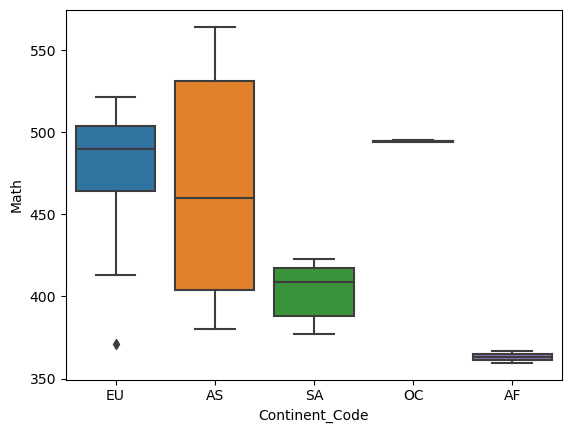

In [39]:
sns.boxplot(x = "Continent_Code", y = "Math", data = pisa);

In [42]:
stats.ttest_ind(pisa[pisa.Continent_Code == "EU"]["Math"], pisa[pisa.Continent_Code == "AS"]["Math"])

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [ ]:
# fail to reject